<a href="https://colab.research.google.com/github/ms624atyale/Python_Basics/blob/main/WordCloud_ModifiedfromMK316.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🐹 🐾 [Text Corpus <font size='1.8'>코퍼스/말뭉치</font>](https://en.wikipedia.org/wiki/Text_corpus)  
- In linguistics, a corpus (plural corpora) or text corpus is a language resource consisting of a large and structured set of texts (nowadays usually electronically stored and processed). In corpus linguistics, they are used to do statistical analysis and hypothesis testing, checking occurrences or validating linguistic rules within a specific language territory.

- The **corpus-toolkit** package grew out of courses in corpus linguistics and learner corpus research. The toolkit attempts to balance simplicity of use, broad application, and scalability. Common corpus analyses such as the <font color = 'red'>_calculation of word and n-gram frequency and range, keyness, and collocation_</font> are included. In addition, more advanced analyses such as the identification of <font color = 'red'>_dependency bigrams (e.g., verb-direct object combinations) and their frequency, range, and strength of association_</font>  are also included.(https://pypi.org/project/corpus-toolkit/)

Some conditions should be fulfilled if you want to conduct corpus-related analysis. 

>1. Read and write a file using an operating system package.
>2. 🆘 import the **[os](https://docs.python.org/3/library/os.html)** module.


>3. Text files you want to analyze (e.g., url(uniform resource locator) with html document, text files under the Files dicrectory of Google Colab).
>4. Text ➡️ Words: **Tokenization**
>5. Words with the conjugation, inflection, derivation process ↔️ Words sorted by grouping inflected or variant forms of the same word (i.e., **lemmatization**)
>6. POS (part of speech (e.g., word-grammatical category pairs))
>7. 🆘 Install **corpus-toolkit** and **nltk**(natural language tool kit) packages.
 


In [1]:
#@markdown 📌 Download the os module 
import os

In [2]:
#@markdown 📌 Make a new working directory as "txtdata". 📎 <Module name: os> <function: mkdir>

os.mkdir("txtdata")

In [3]:
#@markdown 📌 Download the corpus-toolkit package
!pip install corpus-toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.7 MB/s eta 0:00:00


In [4]:
#@markdown 📌 Get working directory. <codeline: print working directory>
%pwd

'/content'

In [11]:
from urllib.request import urlopen

#@markdown 📌 Open a txt file. <Use a set of duble quotation marks "" and assign the url address as the _url_ variable> 
url="https://raw.githubusercontent.com/ms624atyale/Data_Misc/main/crime_punishment_chapter_one.txt"
#When you copy and paste, i) go to the repository of your/someone else's github, ii) click on a txt file of your interest, iii) click on <raw> icon around at the top right hand corner, and iii) copy & paste the url staring with "https://raw.githubusercontent.com/..." 


os.system("curl " + url + " > txtdata.txt") #This moves the whole text of the url to the txtdata folder.  

file = open("txtdata.txt")
text = file.read().replace("\n", " ") #Replace line with a space.
file.close() #Close the file you have been working on.

#@markdown 📎 When you see txtdata.txt under the Files directory, move it under the txtdata folder you've created by drag & drop.

In [12]:
#@markdown 📌 i) Tokenize your text and ii) Get frequency.

from corpus_toolkit import corpus_tools as ct
mydata = ct.ldcorpus("txtdata") #load and read text files under 'txtdata' directory
tok_corp = ct.tokenize(mydata) #tokenize corpus - by default this lemmatizes as well
mydata = ct.frequency(mydata) #creates a frequency dictionary

Processing txtdata.txt (1 of 1 files)


In [13]:
#@markdown 📌 Tagging (i.e., associating each token with a grammatical category (e.g., mountain - N) )
ct.write_corpus("tagged_txt",ct.tag(ct.ldcorpus("txtdata")))

Processing txtdata.txt (1 of 1 files)


In [14]:
#@markdown 📌 Get frequency of your tagged tokens. 'hits=10' means you want to get the top 10 words. 

tagged_freq = ct.frequency(ct.reload("tagged_txt"))
ct.head(tagged_freq, hits = 10)

Processing 1.txt (1 of 1 files)
the_DET	1902
and_CCONJ	1590
be_AUX	1450
he_PRON	1421
a_DET	977
of_ADP	764
in_ADP	708
it_PRON	668
to_PART	581
I_PRON	578


## 💡 Now, let's save tagged data as a dataframe and get word clouds!

In [15]:
#@markdown 📌  Tagged data is in a dictionary format (e.g., {key:value}).
type(tagged_freq)

dict

In [16]:
#@markdown 📌 Import the pandas package so as to handle dataframe.

import pandas as pd

In [17]:
#@markdown 📌 Generate a dateframe with tagged words (e.g., word_POS) and their frequencies. 

data_dict = tagged_freq
data_items = data_dict.items()
data_list = list(data_items)
df = pd.DataFrame(data_list)
df.columns = ["Tagged","Freq"]
print(df)

                 Tagged  Freq
0            PART_PROPN     2
1               one_NUM   110
2          chapter_NOUN     2
3                on_ADP   333
4                an_DET   113
...                 ...   ...
3996          slap_NOUN     1
3997  ungentlemanly_ADV     1
3998        squeal_VERB     2
3999         sein_PROPN     1
4000         Rock_PROPN     1

[4001 rows x 2 columns]


## 💡 Splitting tagged columns into Words and POS <font size = '2.3'> part of speech (i.e., grammatical categories)
  - e.g., 
              column          column 1.    column2
          yesterday_ADP ➡️   yesterday       ADP
          rain_NOUN             rain         NOUN
          yellow_ADJ           yellow.       ADJ

In [18]:
#@markdown 📌 Codelines to get tagged columns split into words and POS

tagged = df["Tagged"]
pos = []
word = []

for i in range(0, len(tagged)):
  w = tagged[i]
  ws = w.split("_")
  word.append(ws[0])
  pos.append(ws[1])

print(len(tagged))
print(word[:10])
print(pos[:10])

4001
['PART', 'one', 'chapter', 'on', 'an', 'EXCEPTIONALLY', 'hot', 'evening', 'early', 'in']
['PROPN', 'NUM', 'NOUN', 'ADP', 'DET', 'PROPN', 'ADJ', 'NOUN', 'ADV', 'ADP']


In [19]:
#@markdown 📌 Add new columns to the dataframe.

df["POS"] = pos
df["Word"] = word

# Rearranging column order (remove Tagged column)
cols = ["POS","Word","Freq"]
df = df[cols]

# Sort by POS and Freq
df = df.sort_values(by=['POS', 'Freq'], ascending = False)
print("Total rows: ", len(df))
df.head()

Total rows:  4001


,POS,Word,Freq
500,X,etc,1
501,X,.,1
3440,X,i.e.,1
66,VERB,go,193
75,VERB,have,173


##⛅  Creating wordclouds by POS
>1. Below, "wc" takes text, not list. So we make word-list-by-POS into a text using 'join'.
>2. In addition, the joined text should include words according to their frequency. (e.g., if "before" occurs 5 times, then the text should include "before before before before before".

In [20]:
#@markdown 📌 Select POS = VERB
df1 = df[df["POS"] == "VERB"]; print(len(df1))

# as list
freq1 = list(df1["Freq"]); print(len(freq1))
txt1 = list(df1["Word"]); print(len(txt1))

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
y = list(y)

txt2 = ' '.join(y); print(len(txt2))
print(txt2)

899
899
899
31079
go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go go have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have hav

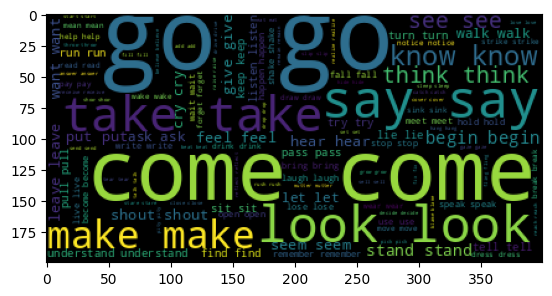

In [21]:
#@markdown 📌 High frequency POS
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wc = WordCloud().generate(str(txt2)) 
plt.imshow(wc)


## ⛅ ⛅The following codes will provide you POS options such as NOUN, ADJ, ADV. 

## 📎 Select POS you want. 

899
       POS    Word  Freq
66    VERB      go   193
75    VERB    have   173
199   VERB       ’   144
14    VERB    come   136
628   VERB     say   112
...    ...     ...   ...
3949  VERB  attest     1
3964  VERB    fume     1
3968  VERB    warn     1
3980  VERB  lavish     1
3983  VERB  patter     1

[899 rows x 3 columns]


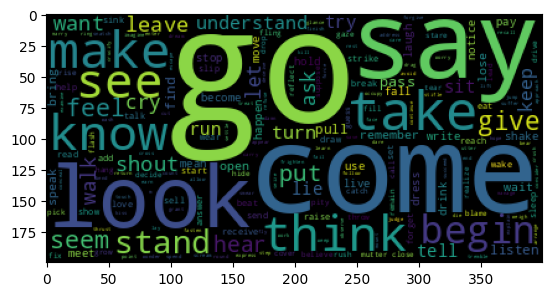

In [22]:
#@markdown 📌 Wordcloud by POS:

pos = "VERB" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

# as list
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
y = list(y)

txt2 = ' '.join(y)

print(df[df["POS"] == pos])
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Collocations = False (otherwise, Wordcloud takes 'light light' as a collocation and add it on the wordcloud )
wc = WordCloud(collocations = False).generate(str(txt2)) 
plt.imshow(wc)

1549
       POS      Word  Freq
13    NOUN       man   123
65    NOUN      time   108
19    NOUN      room    89
193   NOUN      hand    82
541   NOUN     woman    77
...    ...       ...   ...
3977  NOUN     storm     1
3984  NOUN       pea     1
3985  NOUN  dropping     1
3989  NOUN    accent     1
3996  NOUN      slap     1

[1549 rows x 3 columns]


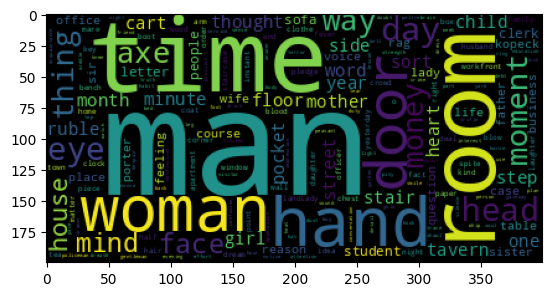

In [23]:
#@markdown 📌 Wordcloud by POS:

pos = "NOUN" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

# as list
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
y = list(y)

txt2 = ' '.join(y)

print(df[df["POS"] == pos])
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Collocations = False (otherwise, Wordcloud takes 'light light' as a collocation and add it on the wordcloud )
wc = WordCloud(collocations = False).generate(str(txt2)) 
plt.imshow(wc)

720
      POS       Word  Freq
434   ADJ        old    89
551   ADJ     little    75
12    ADJ      young    52
223   ADJ       last    50
470   ADJ        own    43
...   ...        ...   ...
3965  ADJ    wounded     1
3972  ADJ      smart     1
3978  ADJ   likeable     1
3979  ADJ  seductive     1
3990  ADJ      tipsy     1

[720 rows x 3 columns]


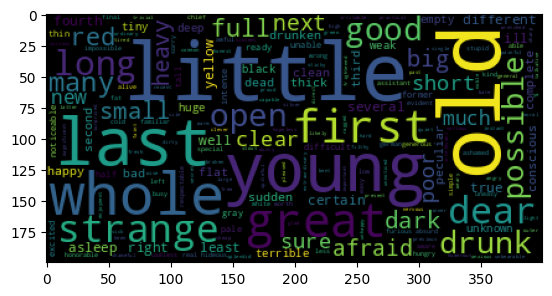

In [24]:
#@markdown 📌 Wordcloud by POS:

pos = "ADJ" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

# as list
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
y = list(y)

txt2 = ' '.join(y)

print(df[df["POS"] == pos])
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Collocations = False (otherwise, Wordcloud takes 'light light' as a collocation and add it on the wordcloud )
wc = WordCloud(collocations = False).generate(str(txt2)) 
plt.imshow(wc)

380
      POS           Word  Freq
105   ADV             so   132
122   ADV           even   112
234   ADV            now   105
538   ADV           then   100
327   ADV           very    89
...   ...            ...   ...
3981  ADV    incessantly     1
3987  ADV    confidently     1
3988  ADV              b     1
3992  ADV           ganz     1
3997  ADV  ungentlemanly     1

[380 rows x 3 columns]


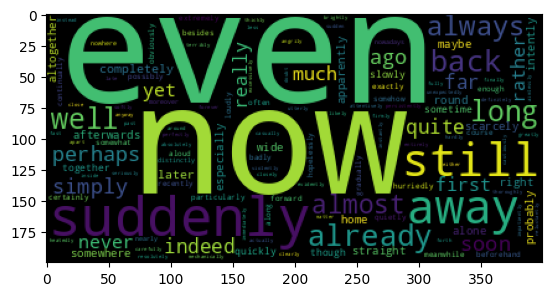

In [25]:
#@markdown 📌 Wordcloud by POS:

pos = "ADV" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

# as list
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
y = list(y)

txt2 = ' '.join(y)

print(df[df["POS"] == pos])
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Collocations = False (otherwise, Wordcloud takes 'light light' as a collocation and add it on the wordcloud )
wc = WordCloud(collocations = False).generate(str(txt2)) 
plt.imshow(wc)

## ⛅ ⛅ I don't like the background in black. I want it WHITE!!! ⛄⚡

In [28]:
#@markdown 📌 Exclude short words from your word cloud.

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
#stopwords.add('us')
len(stopwords)
spltxt = text.split()

899


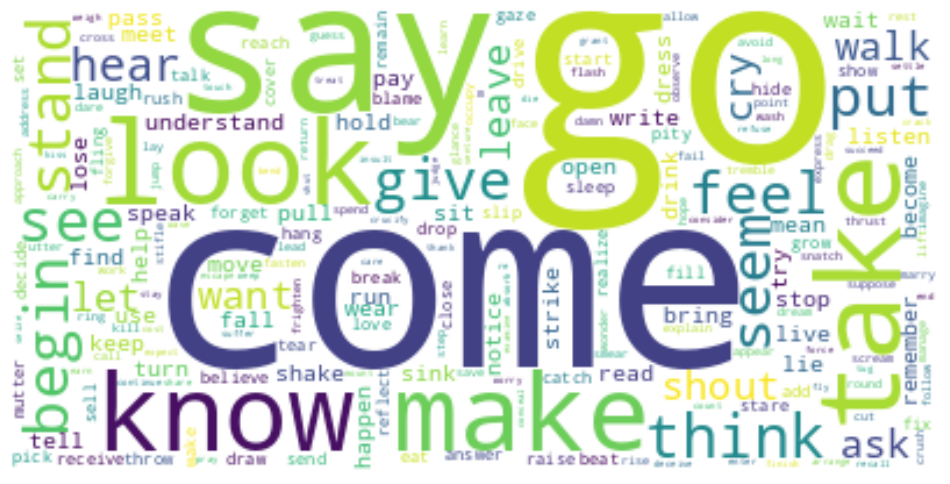

In [27]:
#@markdown 📌 Wordcloud by POS:

pos = "VERB" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

# as list
freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

# Repeat words by Freq
import numpy as np
# x = np.array(txt1)
y = np.repeat(txt1, freq1, axis=0)
spltxt = list(y)

wordcloud = WordCloud(stopwords=stopwords,relative_scaling = 0.2, random_state=3, collocations = False,
                      max_words=2000, background_color='white').generate(' '.join(spltxt))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#plt.show()
#plt.savefig('wordcloud_title.png')
wordcloud.to_file('wordcloud_title.png')
# wordcloud.to_file('docs/png/wordcloud_title.png')